# Telecom Churn - Case Study

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to 
identify customers at high risk of churn and identify the main indicators of churn.


    project is based on the Indian and Southeast Asian market.
    Predict usage-based churn.
    Predict churn only on high-value customers.
    
    Churn Phases
    In ‘good’ phase the customer is happy with the service and behaves as usual
    In ‘action’ phase The customer experience starts to sore in this phase
    In ‘churn’ phase the customer is said to have churned

    

In [1]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure

In [3]:
#importing CSV file 
df_tele_churn = pd.read_csv("C:/Users/anusha/Downloads/telecom_churn_data.csv", encoding = "ISO-8859-1", low_memory=False )

In [4]:
df_tele_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
#about the dataset
print("Dimensions: ",df_tele_churn.shape, "\n")

# data types
print(df_tele_churn.info())


Dimensions:  (99999, 226) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


In [6]:
#printing columns of dataset
print(df_tele_churn.columns)

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)


In [7]:
# Checking for duplicated rows
sum(df_tele_churn.duplicated(subset='mobile_number'))

0

In [8]:
#Checking for column-wise null count
df_tele_churn.isnull().sum()

mobile_number               0
circle_id                   0
loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_6        0
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
offnet_mou_9             7745
roam_ic_mou_6            3937
roam_ic_mou_7            3859
roam_ic_mou_8            5378
roam_ic_mou_9            7745
roam_og_mou_6            3937
roam_og_mou_7            3859
roam_og_mou_8            5378
roam_og_mou_9            7745
loc_og_t2t_mou_6         3937
                        ...  
arpu_2g_9               74077
night_pck_user_6        74846
night_pck_

In [9]:
#  code for column-wise null percentages here
round(100*(df_tele_churn.isnull().sum()/len(df_tele_churn.index)),2)

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
                        ...  
arpu_2g_9               74.08
night_pck_user_6        74.85
night_pck_

# Data Preparation

# Derive new features

In [10]:
#Find columns with recharge info
#since total recharge amount is to be used for High Value Customer Filter
tot_rech_cols = [col for col in df_tele_churn.columns if 'total_rech_' in col]
print(tot_rech_cols)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']


In [11]:
#Derive Total Data Recharge Amounts

df_tele_churn["total_rech_data_amt_6"] = df_tele_churn["total_rech_data_6"]  * df_tele_churn['av_rech_amt_data_6']
df_tele_churn["total_rech_data_amt_7"] = df_tele_churn["total_rech_data_7"]  * df_tele_churn['av_rech_amt_data_7']
df_tele_churn["total_rech_data_amt_8"] = df_tele_churn["total_rech_data_8"]  * df_tele_churn['av_rech_amt_data_8']
df_tele_churn["total_rech_data_amt_9"] = df_tele_churn["total_rech_data_9"]  * df_tele_churn['av_rech_amt_data_9']

In [12]:
# Drop total_rech_data_* and av_rech_amt_data_*
drop_col = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
df_tele_churn.drop(drop_col, axis=1, inplace=True)

# Filter High Value Customer

we need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [13]:
#Average of Recharge Amount in 6th and 7th Month
av_rech_amt_6n7 = (df_tele_churn["total_rech_amt_6"].fillna(0) + df_tele_churn["total_rech_data_amt_6"].fillna(0) + 
df_tele_churn["total_rech_amt_7"].fillna(0) + df_tele_churn["total_rech_data_amt_7"].fillna(0))/2.0


In [14]:
#70th Percentile of Avg Recharge Amount
pc70_6n7 = np.percentile(av_rech_amt_6n7, 70.0)
print('70 percentile of 6th and 7th months avg recharge amount: ', pc70_6n7)

70 percentile of 6th and 7th months avg recharge amount:  478.0


In [15]:
#shape of dataframe after filtering high value customers
df_high_val_cust = df_tele_churn[av_rech_amt_6n7 >= pc70_6n7]
print('Dataframe Shape after Filtering HIgh Value Customers: ', df_high_val_cust.shape)

Dataframe Shape after Filtering HIgh Value Customers:  (30001, 222)


# Data Cleaning

we can observe that there are some coloumns which are having unique values last_date_of_month-* etc .
lets have a look at that coloumns.

In [16]:
# columns having unique values
col_list = df_high_val_cust.loc[:,df_high_val_cust.apply(pd.Series.nunique) == 1]
col_list.head(5)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
7,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
8,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Removing columns having unique values as these columns are not usefull.

In [17]:
#Remove Columns with only 1 unique value
df_high_val_cust = df_high_val_cust.loc[:,df_high_val_cust.apply(pd.Series.nunique) != 1]
df_high_val_cust.shape

(30001, 206)

In [18]:
df_high_val_cust.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,...,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,...,NaN,802,57.74,19.38,18.74,0.00,NaN,NaN,NaN,NaN
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,NaN,315,21.03,910.65,122.16,0.00,NaN,354.0,207.0,NaN
21,7002124215,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,...,NaN,720,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
23,7000887461,74.350,193.897,366.966,811.480,48.96,50.66,33.58,15.74,85.41,...,1.0,604,40.45,51.86,0.00,0.00,NaN,712.0,540.0,252.0


Converting columns names

as we can observe in data set the datacolumn about perticular month is given in the format arpu_6,arpu_7,arpu_8 but there are some coloumns where coloumn name is like jun_vbc_3g,aug_vbc_3g so renaming these columns. 

In [19]:
df_high_val_cust.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 
                                 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

Checking the columns having object datatype so as to change it to the proper daatype

In [20]:
object_col_data = df_high_val_cust.select_dtypes(include=['object'])
print(object_col_data.iloc[0])

date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_9         9/28/2014
date_of_last_rech_data_6    6/21/2014
date_of_last_rech_data_7    7/16/2014
date_of_last_rech_data_8     8/8/2014
date_of_last_rech_data_9          NaN
Name: 0, dtype: object


as we can see the date columns are in object format ,changing the datatype of above coloumns to date format.

In [21]:
# convert to datetime
for col in object_col_data.columns:
    df_high_val_cust[col] = pd.to_datetime(df_high_val_cust[col])


Handling the columns wise null values

In [22]:
round(100*(df_high_val_cust.isnull().sum()/len(df_high_val_cust.index)),2)

mobile_number             0.00
arpu_6                    0.00
arpu_7                    0.00
arpu_8                    0.00
arpu_9                    0.00
onnet_mou_6               1.82
onnet_mou_7               1.79
onnet_mou_8               3.91
onnet_mou_9               6.34
offnet_mou_6              1.82
offnet_mou_7              1.79
offnet_mou_8              3.91
offnet_mou_9              6.34
roam_ic_mou_6             1.82
roam_ic_mou_7             1.79
roam_ic_mou_8             3.91
roam_ic_mou_9             6.34
roam_og_mou_6             1.82
roam_og_mou_7             1.79
roam_og_mou_8             3.91
roam_og_mou_9             6.34
loc_og_t2t_mou_6          1.82
loc_og_t2t_mou_7          1.79
loc_og_t2t_mou_8          3.91
loc_og_t2t_mou_9          6.34
loc_og_t2m_mou_6          1.82
loc_og_t2m_mou_7          1.79
loc_og_t2m_mou_8          3.91
loc_og_t2m_mou_9          6.34
loc_og_t2f_mou_6          1.82
                         ...  
night_pck_user_9         49.27
monthly_

as we can see there are some columns having more than 40% of null data .

In [23]:
#dropping columns having more than 40% of null values except for the 9th month
columns = df_high_val_cust.columns
percent_missing = df_high_val_cust.isnull().sum() * 100 / len(df_high_val_cust)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
drop_col = missing_value_df.loc[(missing_value_df["column_name"].str.contains('_9')==False) & (missing_value_df["percent_missing"] > 40.0)]["column_name"]

df_high_val_cust.drop(drop_col, axis=1, inplace=True)
df_high_val_cust.shape

(30001, 179)

In [24]:
#Drop Rows with all Null Values
df_high_val_cust = df_high_val_cust.dropna(how='all',axis=0) 
df_high_val_cust.shape

(30001, 179)

Dropping Highly correlated columns 

In [25]:
#Find Highly correlated data 
cor = df_high_val_cust.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

monthly_3g_6        vol_3g_mb_6         0.601308
total_ic_mou_7      loc_ic_t2t_mou_7    0.601684
arpu_2g_9           count_rech_3g_9     0.602386
total_og_mou_8      onnet_mou_9         0.603450
total_rech_amt_8    arpu_6              0.603673
roam_og_mou_8       roam_og_mou_7       0.604862
offnet_mou_8        offnet_mou_6        0.604877
total_ic_mou_8      loc_ic_t2t_mou_8    0.605243
std_ic_mou_6        std_ic_t2m_mou_7    0.606225
std_og_mou_9        std_og_t2m_mou_8    0.606539
arpu_2g_9           vol_3g_mb_8         0.606779
std_ic_mou_7        std_ic_t2m_mou_8    0.606866
loc_og_mou_6        loc_og_t2t_mou_7    0.607059
vbc_3g_8            vol_3g_mb_8         0.607689
std_og_mou_8        std_og_t2m_mou_9    0.608170
std_og_mou_9        offnet_mou_9        0.608690
total_rech_amt_8    total_rech_amt_6    0.609306
total_og_mou_6      std_og_t2t_mou_6    0.610417
total_rech_amt_6    arpu_8              0.610687
std_og_mou_7        std_og_t2t_mou_8    0.611096
roam_ic_mou_8       

In [26]:
#dropping highly correlated columns
drop_col_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','arpu_2g_9','count_rech_2g_9','count_rech_3g_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
                 
df_high_val_cust.drop(drop_col_list, axis=1, inplace=True)
df_high_val_cust.shape

(30001, 124)

# Tag Churners

In [27]:
round(100*(df_high_val_cust.isnull().sum()/len(df_high_val_cust.index)),2)

mobile_number             0.00
arpu_6                    0.00
arpu_7                    0.00
arpu_8                    0.00
arpu_9                    0.00
onnet_mou_6               1.82
onnet_mou_7               1.79
onnet_mou_8               3.91
onnet_mou_9               6.34
offnet_mou_6              1.82
offnet_mou_7              1.79
offnet_mou_8              3.91
offnet_mou_9              6.34
roam_ic_mou_6             1.82
roam_ic_mou_7             1.79
roam_ic_mou_8             3.91
roam_ic_mou_9             6.34
roam_og_mou_6             1.82
roam_og_mou_7             1.79
roam_og_mou_8             3.91
roam_og_mou_9             6.34
loc_og_t2c_mou_6          1.82
loc_og_t2c_mou_7          1.79
loc_og_t2c_mou_8          3.91
loc_og_t2c_mou_9          6.34
loc_og_mou_6              1.82
loc_og_mou_7              1.79
loc_og_mou_8              3.91
loc_og_mou_9              6.34
std_og_t2f_mou_6          1.82
                         ...  
vol_2g_mb_6               0.00
vol_2g_m

In [28]:
df_high_val_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74


In [29]:
#churned customers (churn=1, else 0) 
df_high_val_cust['churn'] = np.where(df_high_val_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 
                                   1,
                                   0)

In [30]:
df_high_val_cust['churn'].head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [31]:
#Remove All 9th Month related columns
drop_cols = [col for col in df_high_val_cust.columns if '_9' in col]
print(drop_cols)

df_high_val_cust.drop(drop_cols, axis=1, inplace=True)

df_high_val_cust.shape

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9', 'total_rech_data_amt_9']


(30001, 87)

In [32]:
round(100*(df_high_val_cust.isnull().sum()/len(df_high_val_cust.index)),2)

mobile_number         0.00
arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
onnet_mou_6           1.82
onnet_mou_7           1.79
onnet_mou_8           3.91
offnet_mou_6          1.82
offnet_mou_7          1.79
offnet_mou_8          3.91
roam_ic_mou_6         1.82
roam_ic_mou_7         1.79
roam_ic_mou_8         3.91
roam_og_mou_6         1.82
roam_og_mou_7         1.79
roam_og_mou_8         3.91
loc_og_t2c_mou_6      1.82
loc_og_t2c_mou_7      1.79
loc_og_t2c_mou_8      3.91
loc_og_mou_6          1.82
loc_og_mou_7          1.79
loc_og_mou_8          3.91
std_og_t2f_mou_6      1.82
std_og_t2f_mou_7      1.79
std_og_t2f_mou_8      3.91
std_og_mou_6          1.82
std_og_mou_7          1.79
std_og_mou_8          3.91
isd_og_mou_6          1.82
isd_og_mou_7          1.79
                      ... 
ic_others_8           3.91
total_rech_num_6      0.00
total_rech_num_7      0.00
total_rech_num_8      0.00
max_rech_amt_6        0.00
max_rech_amt_7        0.00
m

In [33]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "Telecom Churn"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()



In [34]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

Correlation matrix:

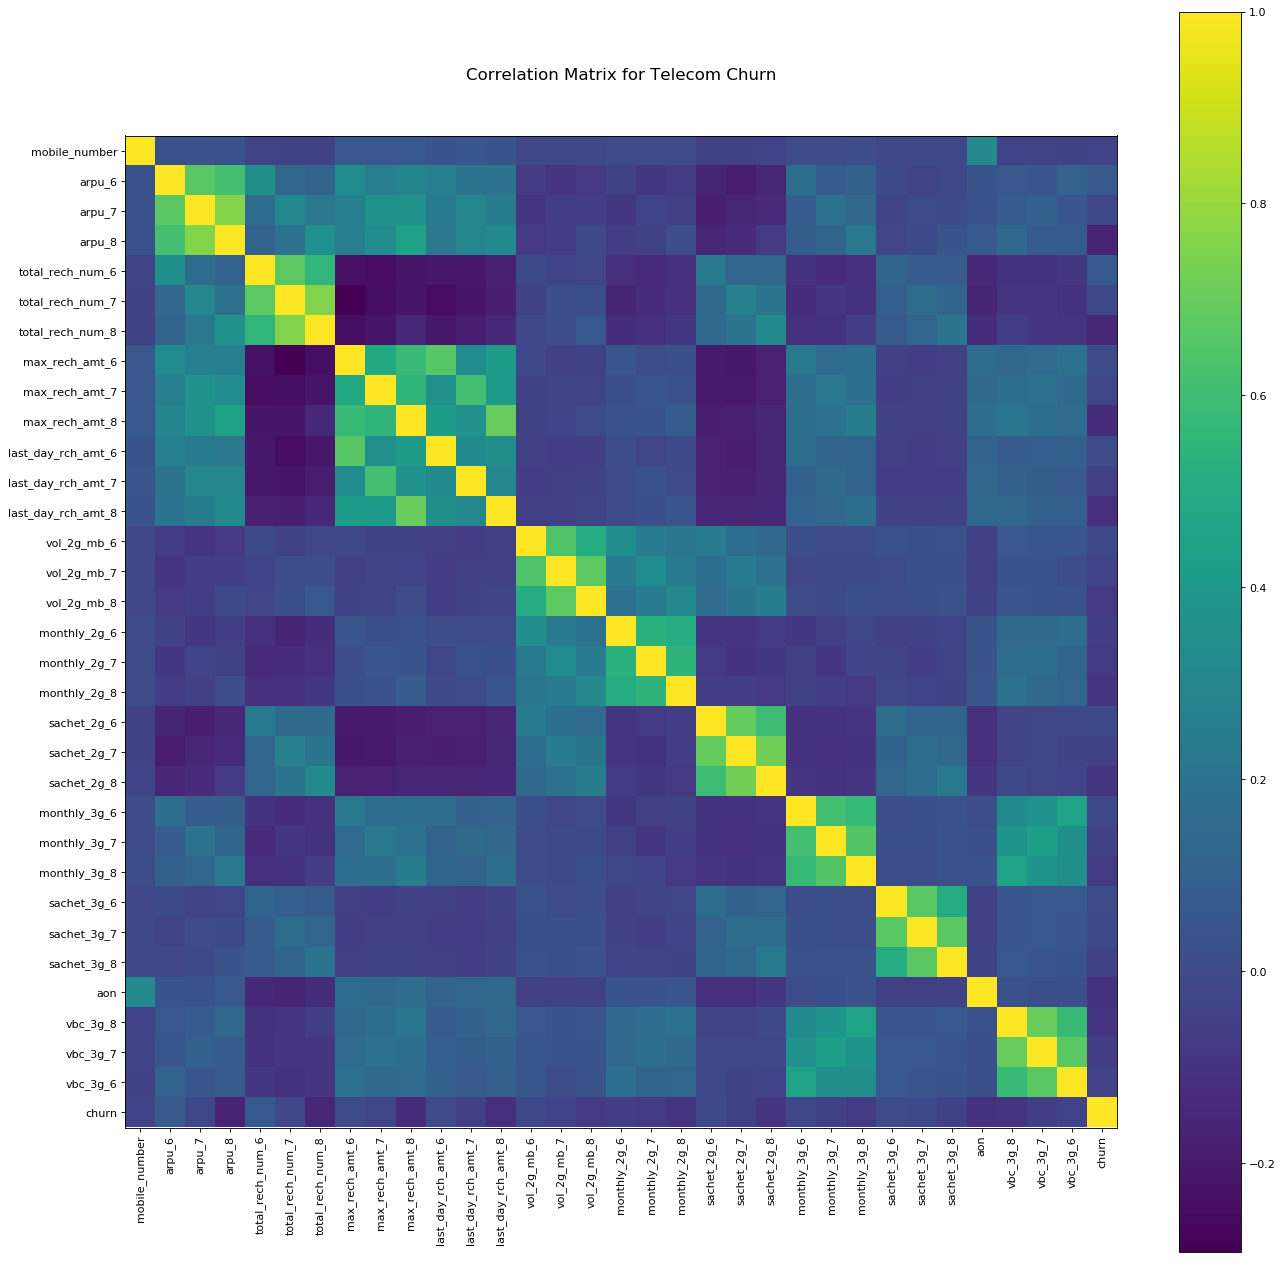

In [35]:
plotCorrelationMatrix(df_high_val_cust, 20)

Scatter and density plots:

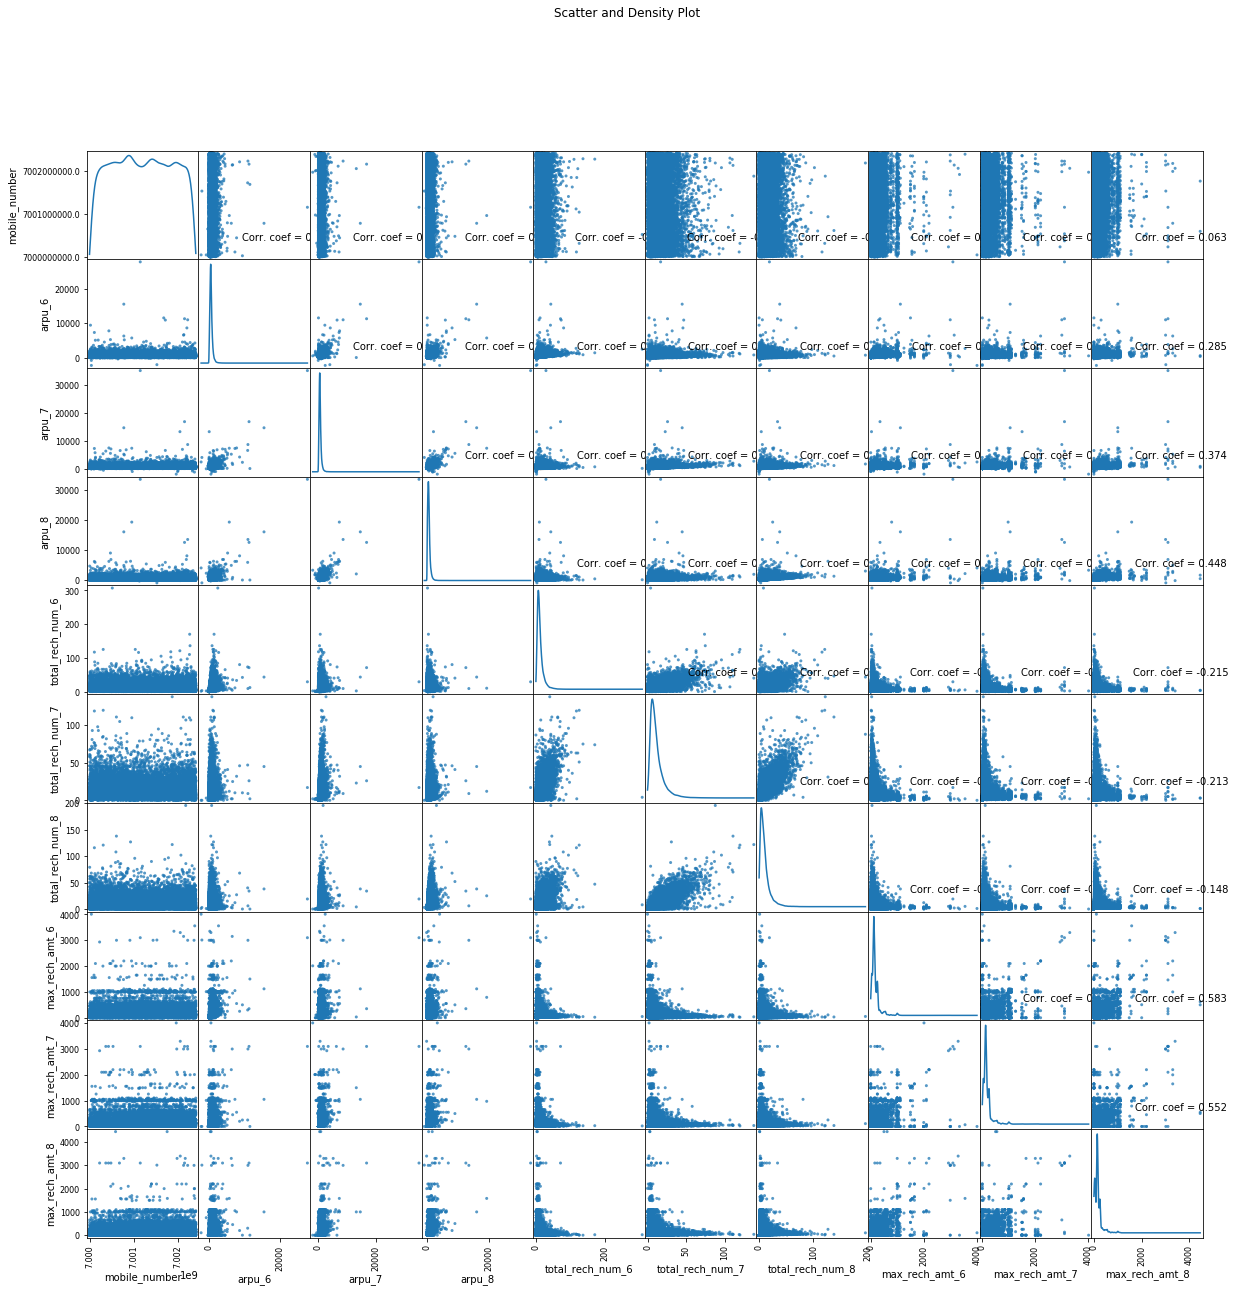

In [36]:
plotScatterMatrix(df_high_val_cust, 20, 10)

Reduce the No of Columns by Creating New Meaningful Features

Create Columns with Average of 6th & 7th Month Since it's a "Good" Phase and Keep the 8th month untouched as it's "Action" Phase, for now to see if it can give any additional insight

In [37]:
col_list = df_high_val_cust.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

print (df_high_val_cust.shape)

for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    df_high_val_cust[avg_col_name] = (df_high_val_cust[col_6]  + df_high_val_cust[col_7])/ 2

(30001, 87)
arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2c_mou
loc_og_mou
std_og_t2f_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_mou
std_ic_t2t_mou
std_ic_t2f_mou
std_ic_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
max_rech_amt
last_day_rch_amt
vol_2g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g


In [38]:
print (df_high_val_cust.shape)

col_list = df_high_val_cust.filter(regex='_6|_7').columns

df_high_val_cust.drop(col_list, axis=1, inplace=True)
df_high_val_cust.shape

(30001, 115)


(30001, 59)

In [39]:
#Conevrt AON in Months
df_high_val_cust['aon_mon'] = df_high_val_cust['aon']/30
df_high_val_cust.drop('aon', axis=1, inplace=True)
df_high_val_cust['aon_mon'].head()

0     32.266667
7     26.733333
8     10.500000
21    24.000000
23    20.133333
Name: aon_mon, dtype: float64

Text(0.5,1,'Churn Distribution')

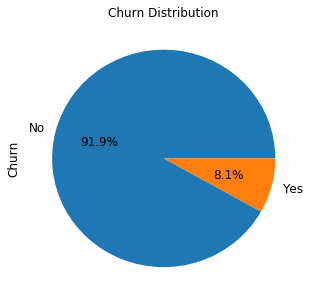

In [40]:
#Churn Distribution
ax = (df_high_val_cust['churn'].value_counts()*100.0 /len(df_high_val_cust)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)

In our data, 91% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

Correlation matrix:

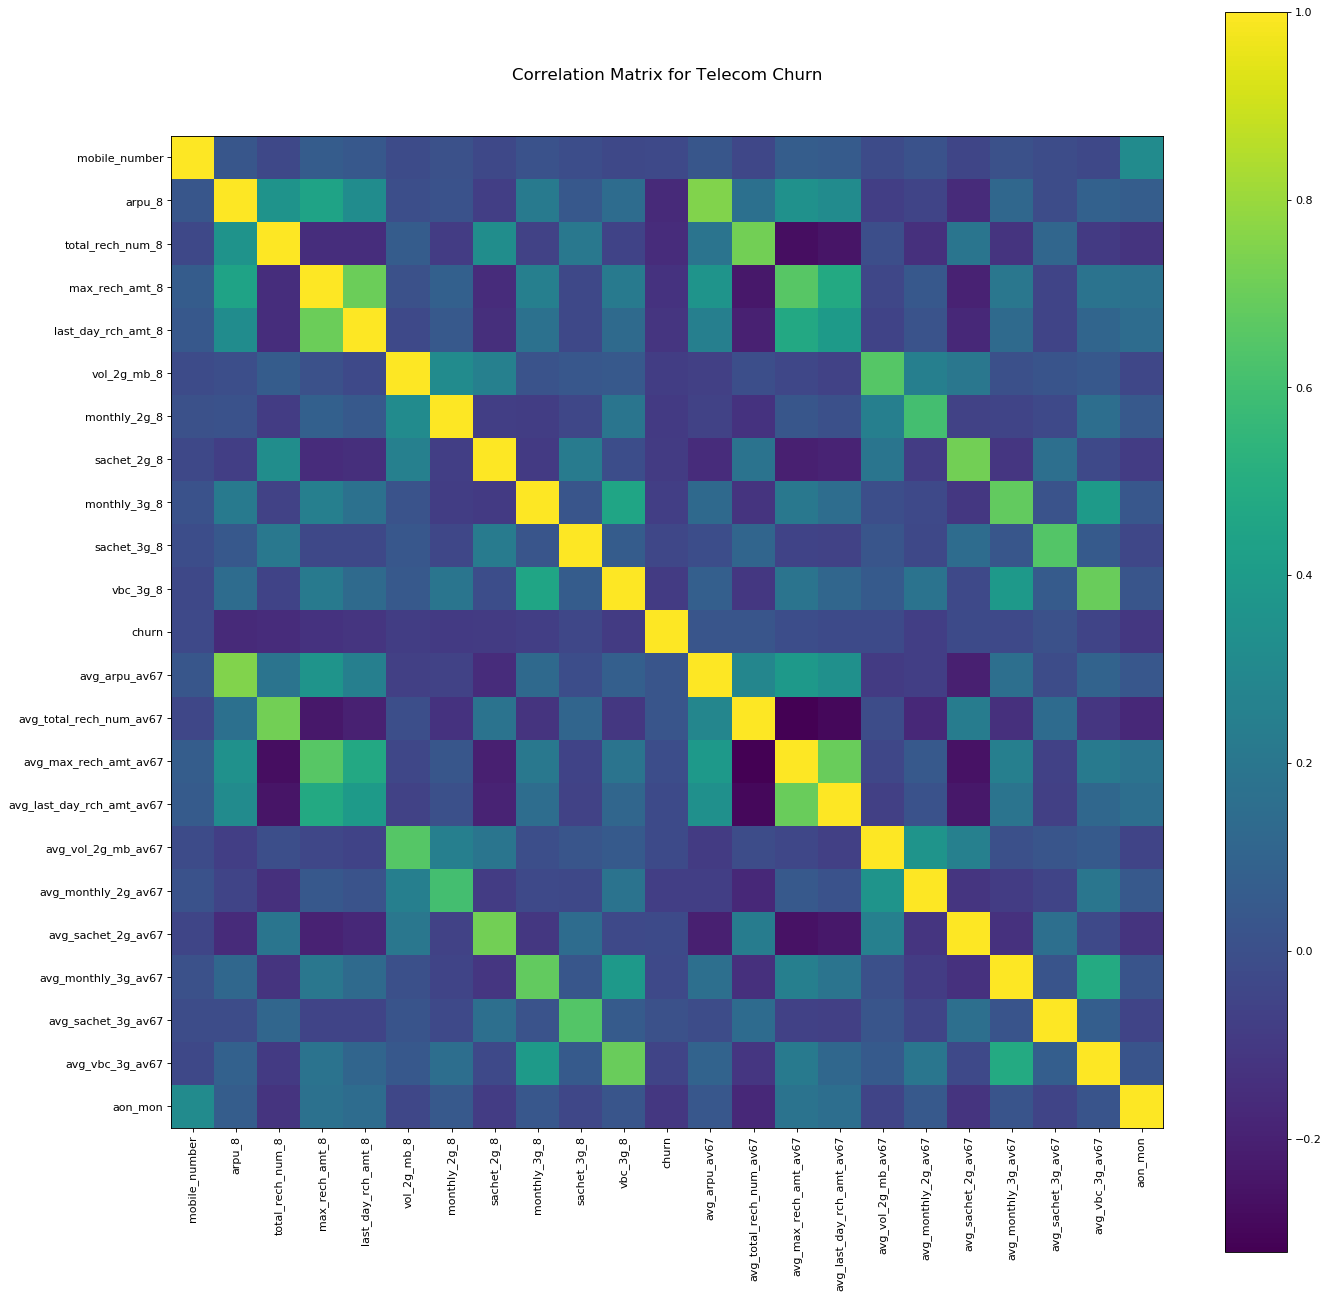

In [41]:
plotCorrelationMatrix(df_high_val_cust,20)

Scatter and density plots:

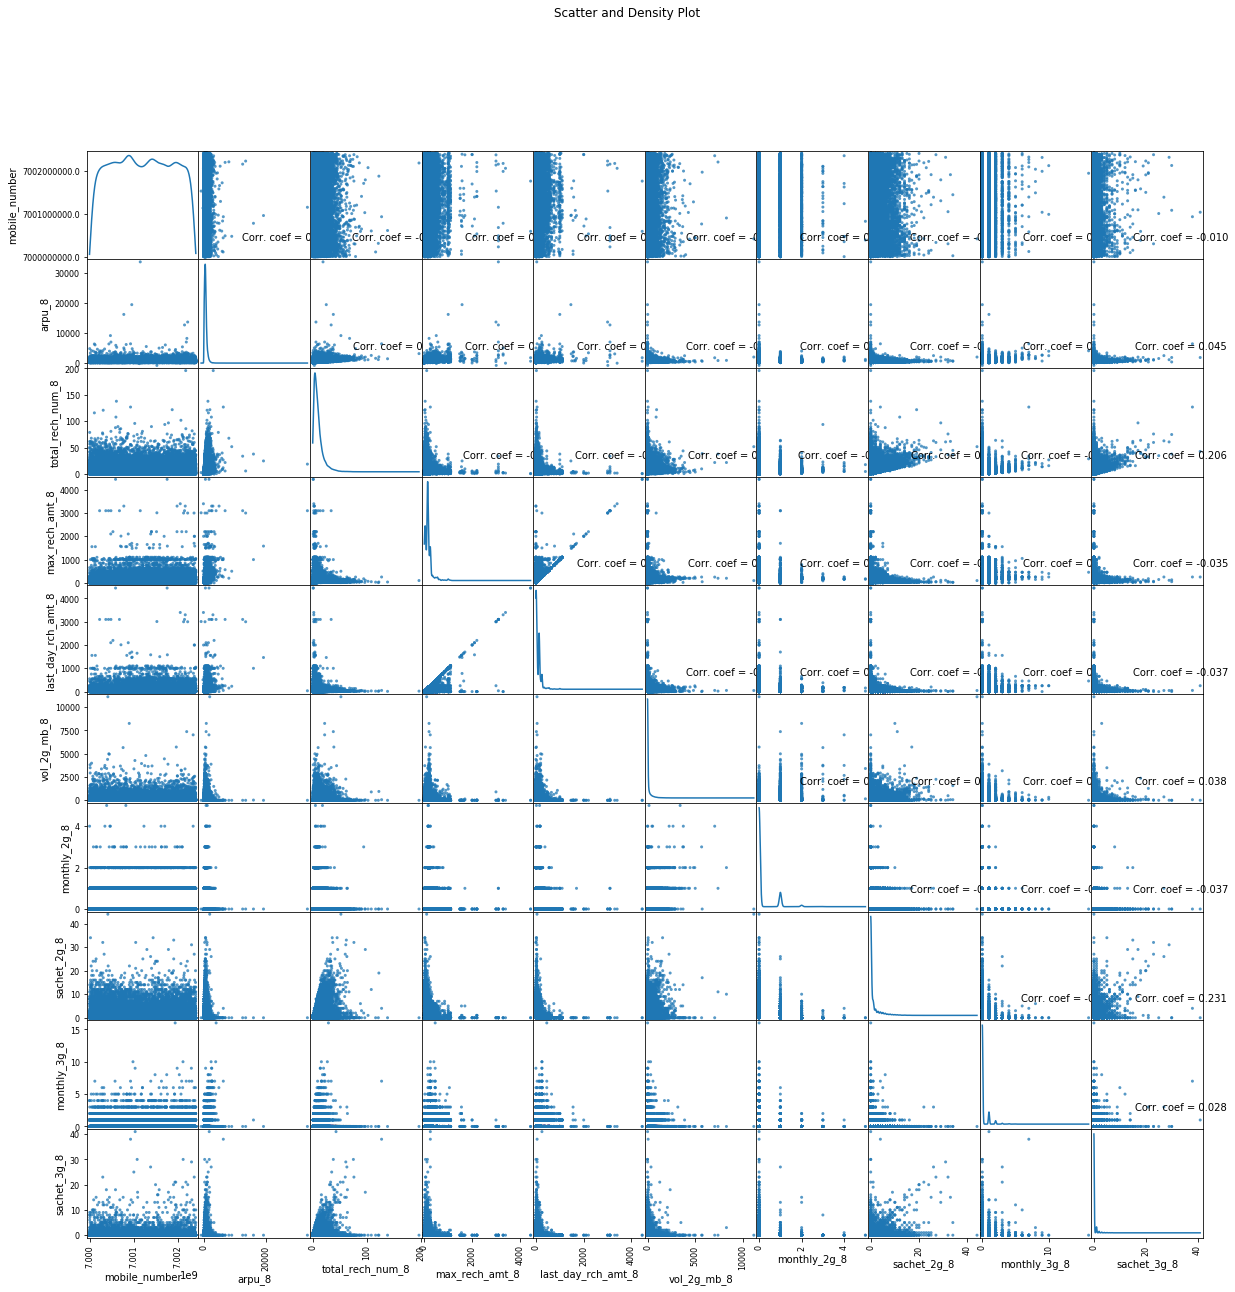

In [42]:
plotScatterMatrix(df_high_val_cust, 20, 10)

Text(0.5,1,'Customers by their tenure')

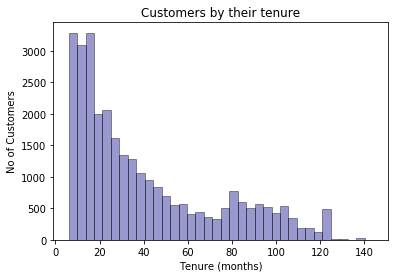

In [43]:
ax = sns.distplot(df_high_val_cust['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Customers by their tenure')

In [44]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
df_high_val_cust['tenure_range'] = pd.cut(df_high_val_cust['aon_mon'], tn_range, labels=tn_label)
df_high_val_cust['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

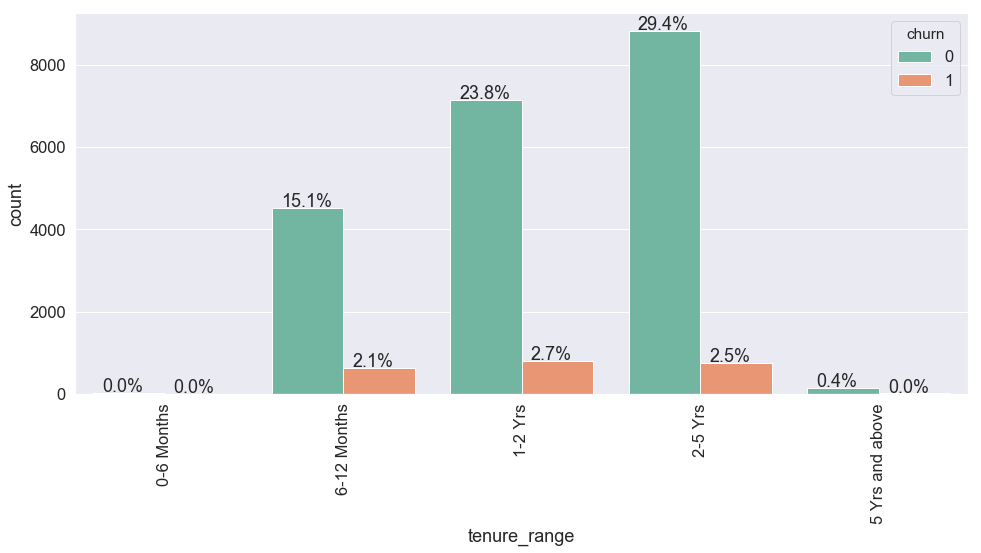

In [45]:
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

temp = pd.Series(data = 'tenure_range')
fig, ax = plt.subplots()
width = len(df_high_val_cust['tenure_range'].unique()) + 6 + 4*len(temp.unique())
fig.set_size_inches(width , 7)

total = float(len(df_high_val_cust.index))
ax = sns.countplot(x="tenure_range", data=df_high_val_cust, palette="Set2", hue = "churn");
for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df_high_val_cust))), (p.get_x()+0.05, p.get_height()+20))
plt.xticks(rotation=90)
plt.show()



Correlation of "Churn" with other variables:

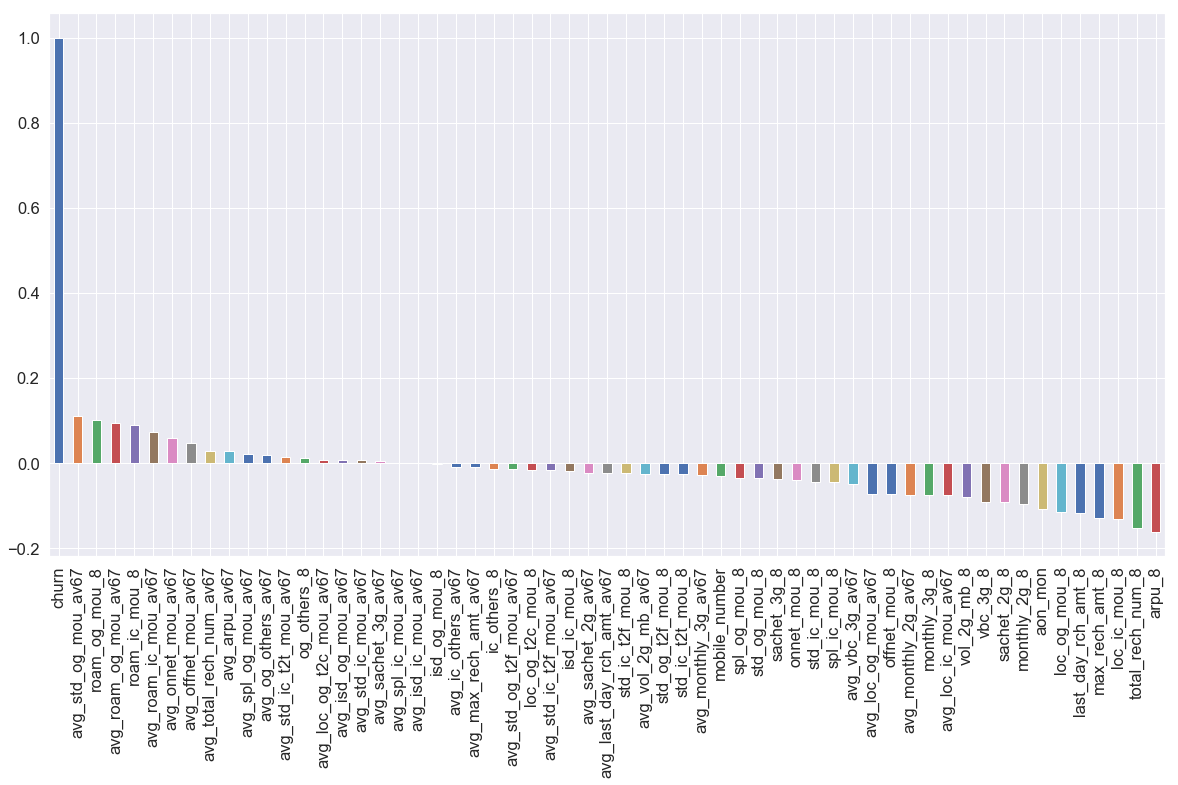

In [46]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(20,10))
df_high_val_cust.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

Avg STD Outgoing Calls for Month 6 & 7, Outgoing calls in Roaming seems to be positively correlated with Churn while Avg Revenue, No Of Recharge for 8th Month seems negatively correlated.

Lets look at the relation between total recharge in 8th Month Vs Average Revenue in 8th Month

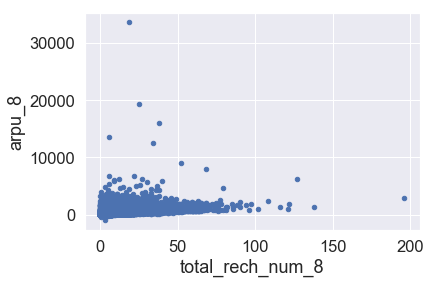

In [47]:
df_high_val_cust[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')

Finally, let's take a look at out predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot.

Churn vs Tenure

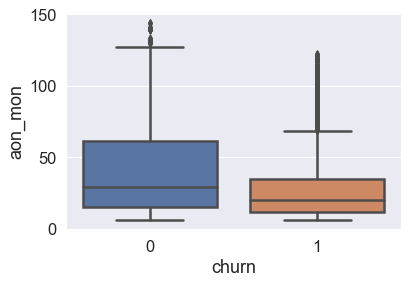

In [48]:
sns.boxplot(x = df_high_val_cust.churn, y = df_high_val_cust.aon_mon)

As we can see form the below plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

In [49]:
#Lets Create New DF for Model Building

df = df_high_val_cust[:].copy()

#Dropping tenure_range since we have AON MONTH already and columns are highly coorelated
df.drop('tenure_range', axis=1, inplace=True)
df.drop('mobile_number', axis=1, inplace=True)

#Since All The Values are realted to Price/ Cost/ Amount, Filling NaN with 0

df.fillna(0, inplace=True)

df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,...,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,aon_mon
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.5,252.0,252.0,15.725,0.0,0.0,1.0,0.0,50.600,32.266667
7,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,...,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,19.060,26.733333
8,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,...,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,516.405,10.500000
21,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,...,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,0.000,24.000000
23,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,...,4.0,89.5,89.5,0.240,0.0,0.0,1.0,0.0,25.930,20.133333


In [50]:
round(100*(df.isnull().sum()/len(df.index)),2)

arpu_8                       0.0
onnet_mou_8                  0.0
offnet_mou_8                 0.0
roam_ic_mou_8                0.0
roam_og_mou_8                0.0
loc_og_t2c_mou_8             0.0
loc_og_mou_8                 0.0
std_og_t2f_mou_8             0.0
std_og_mou_8                 0.0
isd_og_mou_8                 0.0
spl_og_mou_8                 0.0
og_others_8                  0.0
loc_ic_mou_8                 0.0
std_ic_t2t_mou_8             0.0
std_ic_t2f_mou_8             0.0
std_ic_mou_8                 0.0
spl_ic_mou_8                 0.0
isd_ic_mou_8                 0.0
ic_others_8                  0.0
total_rech_num_8             0.0
max_rech_amt_8               0.0
last_day_rch_amt_8           0.0
vol_2g_mb_8                  0.0
monthly_2g_8                 0.0
sachet_2g_8                  0.0
monthly_3g_8                 0.0
sachet_3g_8                  0.0
vbc_3g_8                     0.0
churn                        0.0
avg_arpu_av67                0.0
avg_onnet_

In [51]:
X = df.drop(['churn'], axis=1)
y = df['churn']

df.drop('churn', axis=1, inplace=True)

In [52]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

C:\Users\anusha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\anusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [53]:
# Split in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [54]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data : ", y_train_imb)
print("Imbalance in Test Data : ", y_test_imb)

X_train Shape :  (21000, 57)
X_test Shape :  (9001, 57)
Imbalance in Train Data :  0.0887598506844
Imbalance in Test Data :  0.0881286266925


In [55]:
# Balancing DataSet
from imblearn.over_sampling import SMOTE

sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)

In [56]:
print("X_tr Shape", X_tr.shape)
print("y_tr Shape", y_tr.shape)

imb = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data : ",imb)

X_tr Shape (38576, 57)
y_tr Shape (38576,)
Imbalance in Train Data :  1.0


# Model Building

RFE

In [57]:
# Feature reduction using RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE

# running RFE with 15 variables as output
rfe = RFE(lr, 15)   
rfe = rfe.fit(X_tr, y_tr)

In [58]:
rfe_features = list(df.columns[rfe.support_])
print("Features identified by RFE ", rfe_features)

Features identified by RFE  ['loc_og_mou_8', 'og_others_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'avg_arpu_av67', 'avg_loc_ic_mou_av67', 'avg_std_ic_mou_av67']


In [59]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6608 1664]
 [ 139  590]]


In [62]:
print('Accuracy of Logistic Regression Model on test set is ',lr.score(X_test_rfe, y_test))

Accuracy of Logistic Regression Model on test set is  0.799688923453


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8272
           1       0.26      0.81      0.40       729

   micro avg       0.80      0.80      0.80      9001
   macro avg       0.62      0.80      0.64      9001
weighted avg       0.92      0.80      0.84      9001



In [64]:
# To get the weights of all the variables
weights = pd.Series(lr.coef_[0],
                 index=rfe_features)
weights.sort_values(ascending = False)

avg_loc_ic_mou_av67    0.628532
avg_arpu_av67          0.579054
avg_std_ic_mou_av67    0.278859
vol_2g_mb_8           -0.329826
spl_ic_mou_8          -0.459094
std_ic_t2f_mou_8      -0.475273
monthly_3g_8          -0.494383
last_day_rch_amt_8    -0.501856
sachet_2g_8           -0.584501
total_rech_num_8      -0.637884
monthly_2g_8          -0.719725
std_ic_mou_8          -0.821832
loc_og_mou_8          -0.975469
og_others_8           -2.607051
loc_ic_mou_8          -2.653465
dtype: float64

LR Results:

    Model Accuracy is 79%
    Confusion matix clearly shows that the model has drawback in predicting churn as high false positives

PCA

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

#Applying Smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(38576, 57)
(38576,)


In [66]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_tr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

In [67]:
X_tr_pca = pca.fit_transform(X_tr)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(38576, 57)
(9001, 57)


Applying logistic regression using PCA

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(X_tr_pca, y_tr)

# Predicted probabilities
y_pred = lr_pca.predict(X_test_pca)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6741 1531]
 [ 128  601]]


In [70]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred))

Logistic Regression accuracy with PCA:  0.815687145873


In [71]:
col = list(df.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC1,PC2,PC3,Feature
0,0.263203,-0.102767,0.172698,arpu_8
1,0.157721,-0.190353,-0.016040,onnet_mou_8
2,0.215234,-0.169326,0.056542,offnet_mou_8
3,0.324809,0.327460,-0.190111,roam_ic_mou_8
4,0.269125,0.198880,-0.158479,roam_og_mou_8
5,0.036240,-0.059583,-0.003299,loc_og_t2c_mou_8
6,0.120330,-0.101071,0.187642,loc_og_mou_8
7,0.037022,0.002361,0.075829,std_og_t2f_mou_8
8,0.168417,-0.248137,-0.055130,std_og_mou_8
9,0.029561,-0.006400,0.043515,isd_og_mou_8


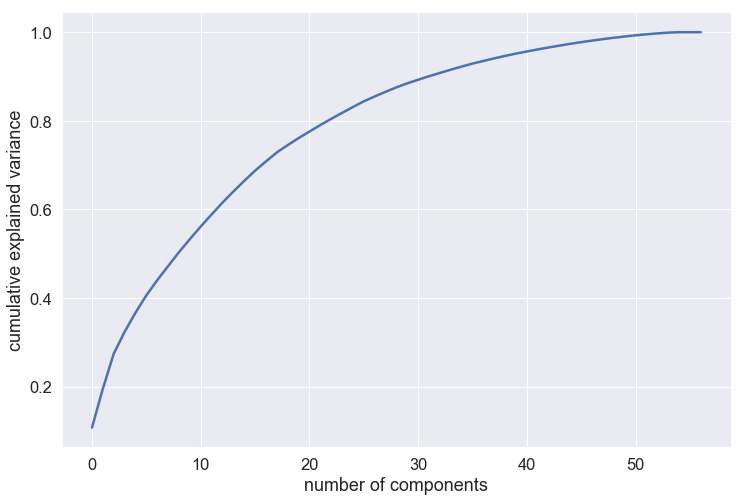

In [72]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Applying LR with 32 columns with 90% variance

In [73]:
pca_32 = PCA(n_components=32)

df_tr_pca_32 = pca_32.fit_transform(X_tr)
print(df_tr_pca_32.shape)

df_test_pca_32 = pca_32.transform(X_test)
print(df_test_pca_32.shape)

(38576, 32)
(9001, 32)


In [74]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_tr_pca_32, y_tr)

# Predicted probabilities
y_pred32 = lr_pca1.predict(df_test_pca_32)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred32)

In [75]:
print(confusion_matrix(y_test,y_pred32))

[[6711 1561]
 [ 139  590]]


In [76]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred32))

Logistic Regression accuracy with PCA:  0.811132096434




PCA Result :

    Model has 81% Accuracy
    32 Features can obtain optimal accuracy with 90% Variance
    Main Features are arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8



Decision Tress

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

#Applying Smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(38576, 57)
(38576,)


Feature Reduction using Lasso

In [78]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_tr)
pos = model.get_support(indices=True)
 ### Feature reduction using Lasso
print(X_lasso.shape)
print(pos)

(38576, 30)
[ 0  2  3  4  6  7  8 10 12 15 16 19 21 22 23 24 25 26 27 28 30 31 36 40 43
 47 48 50 51 56]


In [79]:
#feature vector for decision tree
lasso_features = list(df.columns[pos])
print("Features for LASSO model buidling: ", lasso_features)

Features for LASSO model buidling:  ['arpu_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'vbc_3g_8', 'avg_arpu_av67', 'avg_offnet_mou_av67', 'avg_roam_ic_mou_av67', 'avg_std_og_mou_av67', 'avg_loc_ic_mou_av67', 'avg_std_ic_mou_av67', 'avg_total_rech_num_av67', 'avg_max_rech_amt_av67', 'avg_vol_2g_mb_av67', 'avg_monthly_2g_av67', 'aon_mon']


Decision Tree with Default Hyperparameter

In [80]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_lasso, y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
# The evaluation metrics of our default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred1 = dt1.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8272
           1       0.36      0.78      0.49       729

   micro avg       0.87      0.87      0.87      9001
   macro avg       0.67      0.83      0.71      9001
weighted avg       0.93      0.87      0.89      9001



In [82]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred1))
print('Accuracy of Decision Tree :',accuracy_score(y_test,y_pred1))

[[7261 1011]
 [ 159  570]]
Accuracy of Decision Tree : 0.87001444284



Hyperparameter Tuning

Tuning max_depth


In [83]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dt = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [84]:
# scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.123483,0.003899,0.001596,0.000475,1,{'max_depth': 1},0.788362,0.783437,0.787973,0.790122,...,0.787096,0.002332,39,0.786747,0.789112,0.787135,0.787441,0.788543,0.787796,0.000889
1,0.214428,0.008631,0.002200,0.000397,2,{'max_depth': 2},0.807024,0.811560,0.812338,0.812938,...,0.812215,0.003253,38,0.815457,0.811892,0.813383,0.811581,0.810576,0.812578,0.001698
2,0.314755,0.028717,0.001608,0.000485,3,{'max_depth': 3},0.840980,0.857698,0.857957,0.856754,...,0.854651,0.006910,37,0.857939,0.855671,0.854925,0.855810,0.854838,0.855837,0.001120
3,0.372609,0.006628,0.001796,0.000399,4,{'max_depth': 4},0.850311,0.863530,0.861198,0.861810,...,0.859213,0.004660,36,0.865684,0.863772,0.868827,0.861999,0.858143,0.863685,0.003578
4,0.441617,0.007470,0.002195,0.000385,5,{'max_depth': 5},0.864697,0.876620,0.872343,0.877884,...,0.872874,0.004611,35,0.879877,0.879747,0.879196,0.878977,0.876580,0.878875,0.001196


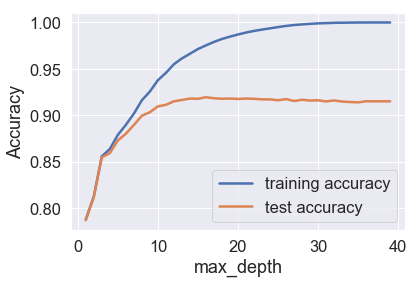

In [85]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

According to above plot, max_depth =10 is optimal

Tuning min_samples_leaf

In [86]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [87]:
# scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.275992,0.034709,0.003191,0.000977,5,{'min_samples_leaf': 5},0.875842,0.916278,0.918481,0.916127,...,0.908622,0.016414,1,0.968146,0.965003,0.966073,0.964843,0.964746,0.965762,0.001283
1,1.031440,0.035453,0.002399,0.000485,25,{'min_samples_leaf': 25},0.881934,0.899430,0.902929,0.910293,...,0.900430,0.009976,2,0.928127,0.920285,0.920901,0.922980,0.922753,0.923009,0.002761
2,0.925132,0.034349,0.002393,0.000488,45,{'min_samples_leaf': 45},0.879601,0.896708,0.899948,0.903293,...,0.896697,0.008931,3,0.912249,0.908166,0.907809,0.909047,0.908885,0.909231,0.001576
3,0.855909,0.026830,0.002001,0.000011,65,{'min_samples_leaf': 65},0.876361,0.896838,0.891265,0.895255,...,0.891954,0.008294,4,0.906448,0.901296,0.900097,0.896377,0.903150,0.901474,0.003330
4,0.818810,0.020815,0.002594,0.000488,85,{'min_samples_leaf': 85},0.868326,0.885562,0.881156,0.890200,...,0.881999,0.007419,5,0.892353,0.895269,0.890570,0.891841,0.893170,0.892641,0.001562


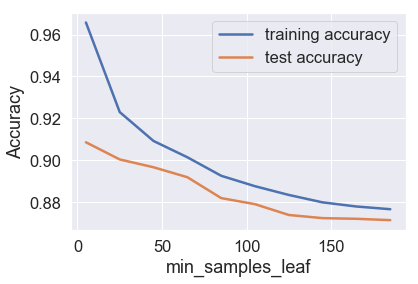

In [88]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_samples_leaf = 25 looks to be optimal

Tuning min_samples_split

In [89]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [90]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.369342,0.012186,0.003391,0.000489,5,{'min_samples_split': 5},0.884785,0.921851,0.918092,0.916515,...,0.913236,0.014527,1,0.994426,0.994038,0.993714,0.993649,0.993682,0.993902,0.000297
1,1.531105,0.093836,0.003592,0.000800,25,{'min_samples_split': 25},0.871306,0.917055,0.916926,0.914960,...,0.907067,0.017903,2,0.963253,0.961892,0.962411,0.962770,0.963029,0.962671,0.000480
2,1.448736,0.093235,0.003196,0.000411,45,{'min_samples_split': 45},0.868585,0.911353,0.910057,0.913275,...,0.902815,0.017149,3,0.949514,0.944750,0.944102,0.946698,0.948221,0.946657,0.002038
3,1.459303,0.108722,0.003191,0.000399,65,{'min_samples_split': 65},0.865993,0.905132,0.908761,0.910682,...,0.899030,0.016674,4,0.940084,0.933539,0.935807,0.937172,0.936621,0.936645,0.002119
4,1.422202,0.056386,0.003386,0.000493,85,{'min_samples_split': 85},0.867678,0.904355,0.905521,0.909774,...,0.898253,0.015428,5,0.935256,0.928581,0.929164,0.930141,0.930303,0.930689,0.002370


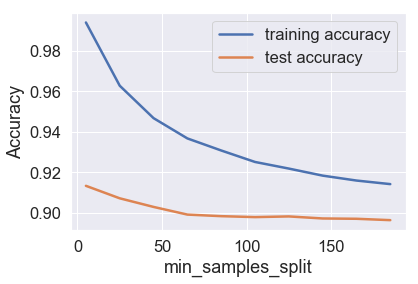

In [91]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_samples_leaf=50 looks optimal

In [92]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_lasso, y_tr)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(25, 175, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [93]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)

Best Accuracy 0.898900871008


In [94]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [95]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini.fit(X_lasso, y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [96]:
# accuracy score
print ('Accuracy Score for Decision Tree Final Model :',clf_gini.score(X_test,y_test))

Accuracy Score for Decision Tree Final Model : 0.870903232974


 Decision Tress:Result

    Getting around 87% accuracy
    Confusion matix shows lot of false positives still exist.
    31 Features were selected for Model Building



Random Forest

Random Forest with Default Hyperparameters

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier()
model_rf.fit(X_lasso, y_tr)

# Make predictions
prediction_test = model_rf.predict(X_test)
print ('Random Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Random Forest Accuracy with Default Hyperparameter 0.924119542273


In [98]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8272
           1       0.53      0.63      0.57       729

   micro avg       0.92      0.92      0.92      9001
   macro avg       0.75      0.79      0.77      9001
weighted avg       0.93      0.92      0.93      9001



In [99]:
# Printing confusion matrix
print(confusion_matrix(y_test, prediction_test))

[[7858  414]
 [ 269  460]]


Hyperparameter Tuning

Tuning max_depth

In [100]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [101]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.270878,0.011329,0.008183,0.000397,2,{'max_depth': 2},0.827112,0.818170,0.817004,0.819808,...,0.815585,0.010486,4,0.834770,0.821452,0.812573,0.815145,0.798846,0.816557,0.011723
1,0.655653,0.010583,0.011369,0.000488,7,{'max_depth': 7},0.879730,0.900078,0.897356,0.898626,...,0.895816,0.008284,3,0.908393,0.905768,0.902884,0.904186,0.904672,0.905181,0.001854
2,1.045602,0.086088,0.015559,0.000489,12,{'max_depth': 12},0.918222,0.933644,0.935200,0.932460,...,0.930942,0.006443,2,0.961277,0.960629,0.957939,0.958752,0.959076,0.959534,0.001233
3,1.183037,0.023316,0.019149,0.001596,17,{'max_depth': 17},0.930404,0.947123,0.945827,0.942053,...,0.943877,0.007762,1,0.985580,0.985612,0.983895,0.987428,0.985192,0.985542,0.001131


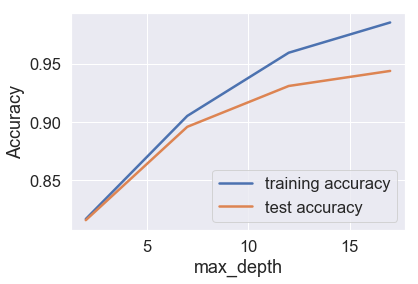

In [102]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Tuning min_samples_leaf

In [103]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 400, 10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(50, 400, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

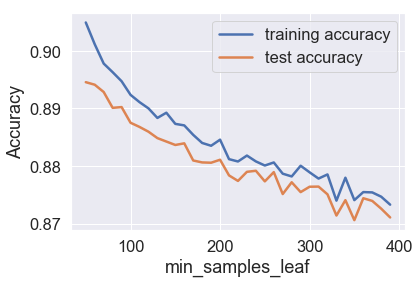

In [104]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Tuning min_samples_split

In [105]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 25)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(100, 500, 25)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

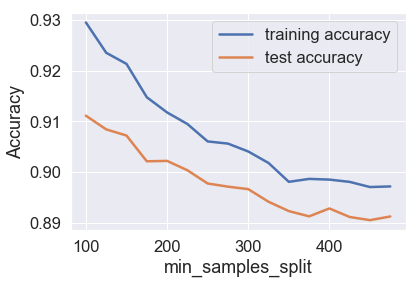

In [106]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

In [108]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5493
           1       0.73      0.41      0.52       508

   micro avg       0.94      0.94      0.94      6001
   macro avg       0.84      0.70      0.75      6001
weighted avg       0.93      0.94      0.93      6001

[[5415   78]
 [ 300  208]]


In [109]:
# accuracy score
print ('Accuracy Score for Random Forest Final Model :',metrics.accuracy_score(y_test, prediction_test))

Accuracy Score for Random Forest Final Model : 0.93701049825


Random Forest:Result

Getting around 94% accuracy


identifying important predictors,and display them visually

C:\Users\anusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


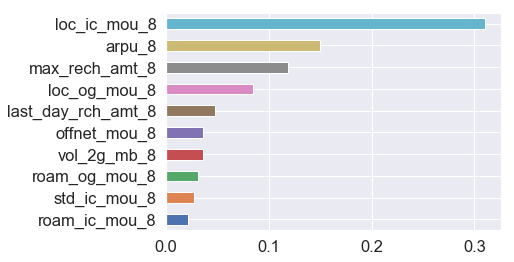

In [110]:
X = df
# Scaling all the variables to a range of 0 to 1
#from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features

importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')



Observations:

From random forest algorithm, Local Incoming for Month 8, Average Revenue Per Customer for Month 8 and Max Recharge Amount for Month 8 are the most important predictor variables to predict churn.




# Recommended strategies to manage customer churn

1.Random forest is the best method to predict the churn.

2.Local incoming Calls and Revenue Per Customer are strong indicators of Churn.

3.offer incentives, such as discounts and special offers, to those customers who were identified as likely to churn.

4.It’s better to target those who appreciate the long-term value of products and see investing in good quality as an advantage.

5.poor customer service is the leading case of customer churn.so Give Better Services.

6.Find out who your best, most vocal and convincing B2B sales reps are and give them the task to talk to those who decided to leave, and in this way – prevent customer churn.

7.Instead of the month-to-month contracts, try offering a longer subscription model.

8.Another way to prevent churn is to actively engage your customers with your product.Give your customers reasons to keep coming back